Processing: birdclef-2025\train_audio\21038\iNat297879.ogg
Processing: birdclef-2025\train_audio\21038\iNat65519.ogg


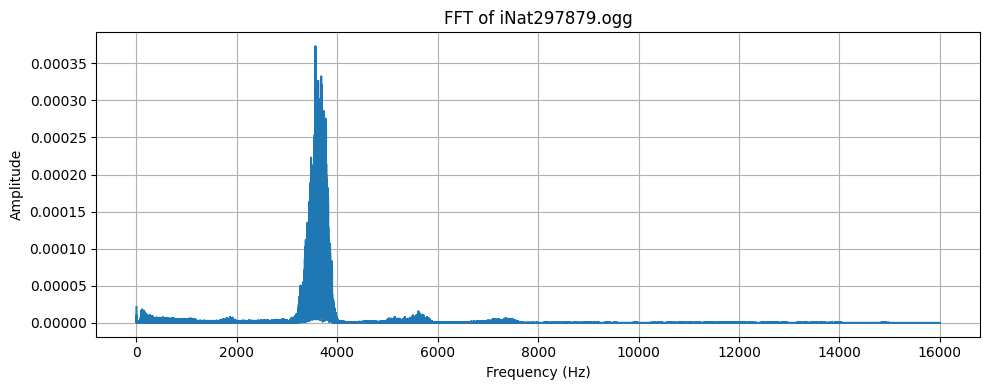

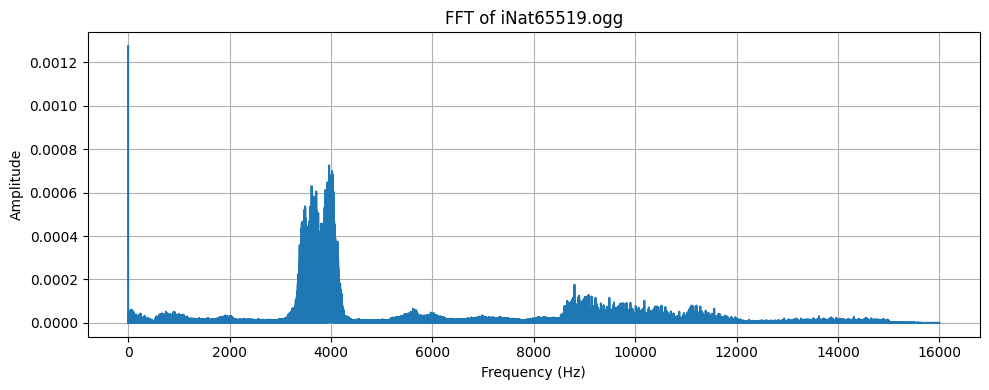

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.fft import fft, fftfreq

ROOT_DIR = "birdclef-2025\\train_audio\\21038"  

def process_and_plot_fft(file_path):
    try:
        data, samplerate = sf.read(file_path)

        if len(data.shape) == 2:
            data = data.mean(axis=1)

        N = len(data)
        T = 1.0 / samplerate
        yf = fft(data)
        xf = fftfreq(N, T)[:N//2]

        plt.figure(figsize=(10, 4))
        plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), label=os.path.basename(file_path))
        plt.title(f"FFT of {os.path.basename(file_path)}")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.grid()
        plt.tight_layout()
        # plt.show()

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

for dirpath, dirnames, filenames in os.walk(ROOT_DIR):
    for filename in filenames:
        if filename.lower().endswith(".ogg"):
            full_path = os.path.join(dirpath, filename)
            print(f"Processing: {full_path}")
            process_and_plot_fft(full_path)


Reading: birdclef-2025\train_audio\21038\iNat297879.ogg
Reading: birdclef-2025\train_audio\21038\iNat65519.ogg


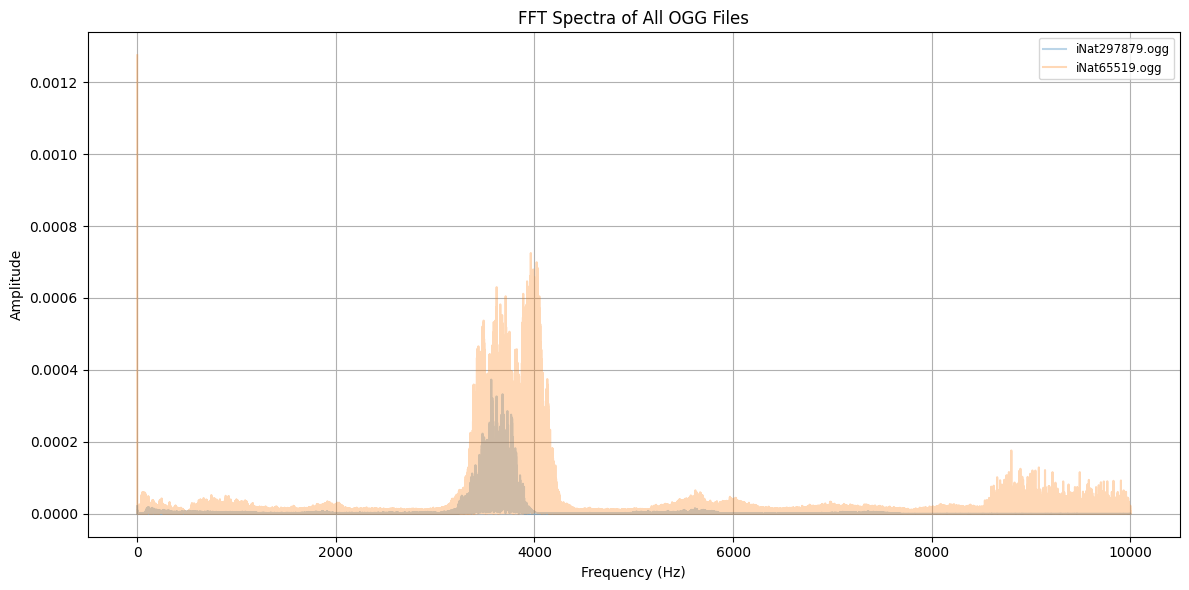

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.fft import fft, fftfreq

ROOT_DIR = "birdclef-2025\\train_audio\\21038"  
MAX_FREQ = 10000  # 시각화할 최대 주파수 [Hz]

def get_fft_data(file_path):
    try:
        data, samplerate = sf.read(file_path)

        if len(data.shape) == 2:
            data = data.mean(axis=1)

        N = len(data)
        T = 1.0 / samplerate
        yf = fft(data)
        xf = fftfreq(N, T)[:N//2]
        amplitude = 2.0 / N * np.abs(yf[:N//2])

        # 주파수 제한
        mask = xf <= MAX_FREQ
        return xf[mask], amplitude[mask], os.path.basename(file_path)

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None, None

fft_results = []

for dirpath, _, filenames in os.walk(ROOT_DIR):
    for filename in filenames:
        if filename.lower().endswith(".ogg"):
            full_path = os.path.join(dirpath, filename)
            print(f"Reading: {full_path}")
            xf, amp, label = get_fft_data(full_path)
            if xf is not None:
                fft_results.append((xf, amp, label))

plt.figure(figsize=(12, 6))

for xf, amp, label in fft_results:
    plt.plot(xf, amp, label=label, alpha = 0.3)

plt.title("FFT Spectra of All OGG Files")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend(loc='upper right', fontsize='small')
plt.grid()
plt.tight_layout()
plt.show()
